In [12]:
import pmdarima as pm
import matplotlib.pyplot as plt

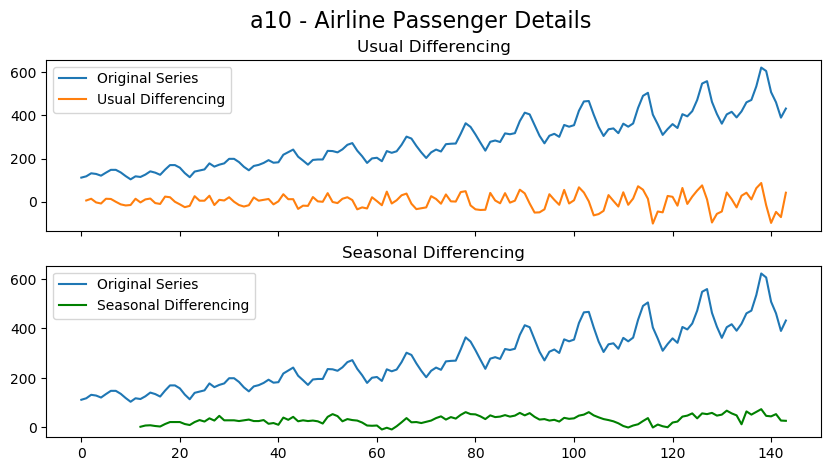

In [13]:
 import pandas as pd
 # Import
data = pd.read_csv(r"C:\Users\NQE00254\Desktop\Power BI Reports\Data Science Courses\Python\AirPassengers.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.index.freq = 'MS'
data.head(10)
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot( data.Passengers ,label='Original Series')
axes[0].plot(data.Passengers.diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot( data.Passengers, label='Original Series')
axes[1].plot( data.Passengers.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Airline Passenger Details', fontsize=16)
plt.show()

In [14]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data.Passengers, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.55 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.44 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.37 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.69 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.05 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.61 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.84 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 17 Sep 2020   AIC                           1019.178
Time:                                     00:51:11   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#import
from pandas.tseries.offsets import DateOffset

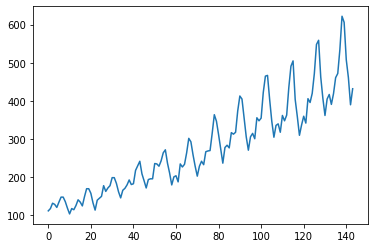

In [16]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)

#index_of_fc = pd.date_range(data.DATE.index[1], periods = n_periods, freq='MS')
index_of_fc = pd.date_range('1960-12-01', periods = n_periods, freq='MS')

#index_of_fc=[data.index[-1]+ DateOffset(months=x)for x in range(0,2)]

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.Passengers)

In [17]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.graph_objs as go
import chart_studio.plotly as py
#plot monthly sales
plot_data = [
    go.Scatter(
        x = data.Passengers,
        y = data.Date
    )
]
plot_layout = go.Layout(
        title='Test Prediction'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

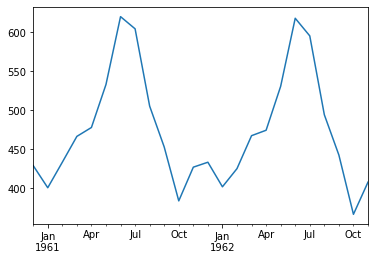

In [18]:
lower_series.plot()

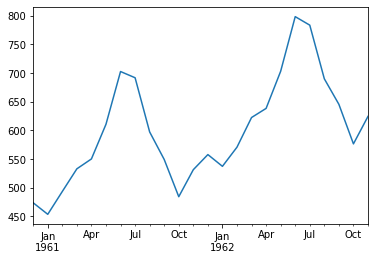

In [19]:
upper_series.plot()

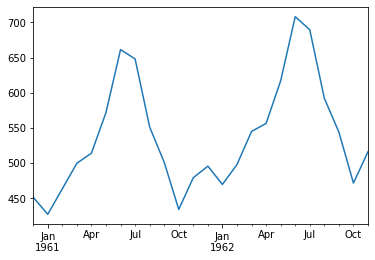

In [20]:
fitted_series.plot()

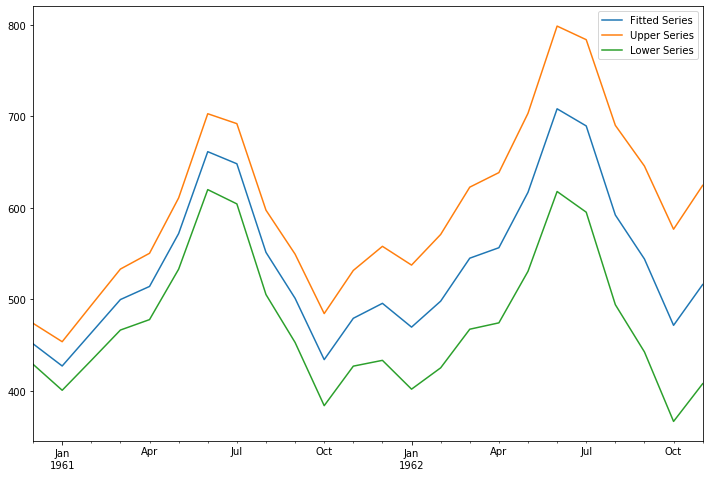

In [21]:
#data.plot(legend=True,label='data')
fitted_series.plot(legend=True,label='Fitted Series',figsize=(12,8))
upper_series.plot(legend=True,label='Upper Series',figsize=(12,8))
lower_series.plot(legend=True,label='Lower Series',figsize=(12,8))